# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Read Input File

In [2]:
# Read the input data file and create a dataframe
data = pd.read_csv('bank-full.csv', header=0)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Explore Data - Univariate analysis

In [3]:
data.shape

(45211, 17)

In [4]:
# OBSERVATION : there are 45211 rows and 17 attributes/columns
# age : age of the customer
# job : type of job
# marital : marital status of the customer
# education : education level of the customer
# default : if the customer has any credit default in the past
# balance : average yearly balance in EUROS
# housing : indicates if the customer has a housing loan or not
# loan : indicates if the customer has a personal loan or not
# contact: contact communication type. values are cellular or telephone
# day : last contact day of the month (Mon, Tue, Wed, Thu, Fri)
# month : last contact month of the year
# duration : last contact duration in seconds 
# campaign : number of contacts performed during this campaign and for this client
# pdays : number of days that passed by after the client was last contacted from a previous campaign. 999 means client was not contacted.
# previous : number of contacts performed before this campaign and for this client 
# poutcome : outcome of the previous marketing campaign (failure or success)
# Target (y) : has the client subscribed a term deposit?

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


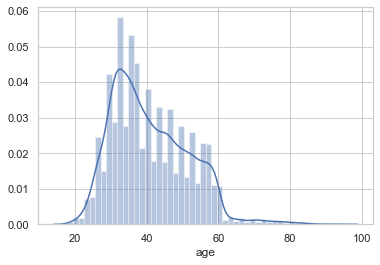

In [6]:
sns.distplot(data['age'])
plt.show()

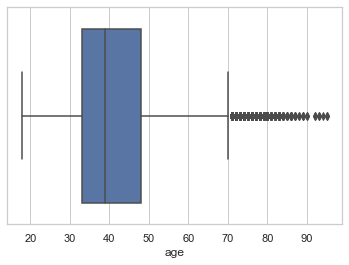

In [7]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["age"])

In [8]:
# OBSERVATION :
# age of the customers lie between 18 to 95 years with a median of 39 years.
# IQR = 15 ; Q1 = 33 ; Q3 = 48 
# lower outliers = Q1 - (1.5 x IQR) =  10.5
# higher outlier = Q3 + (1.5) x IQR) = 70.5 
# Age Values under 10.5 years or over 70.5 years are outliers. 

In [9]:
age_outliers_df = data[(data.age < 10.5) | (data.age > 70.5)]

In [10]:
age_outliers_df.shape

(487, 17)

In [11]:
# OBSERVATION : There are 487 rows of data for customers with age outliers. Approx. 1.07% of data. 

In [12]:
age_outliers_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,no
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,no
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45163,71,retired,married,secondary,no,2064,no,no,cellular,9,nov,379,2,92,3,failure,no
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


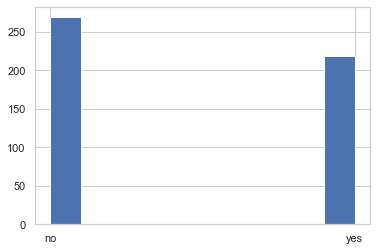

In [13]:
age_outliers_df['Target'].hist()

In [14]:
# The outlier data has customers that are equally likely targets. 

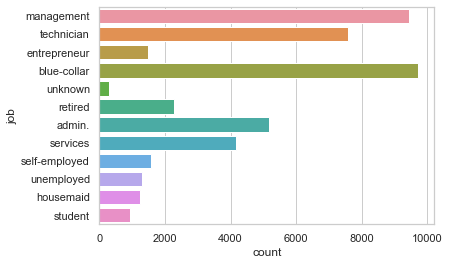

In [15]:
sns.countplot(y="job", data=data)

In [16]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [17]:
# OBSERVATION :
# Most customers have either blue collar, management, technician, admin or services jobs
# There are 288 customers whose jobs are not known

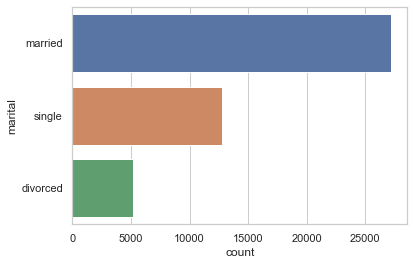

In [18]:
sns.countplot(y="marital", data=data)

In [19]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [20]:
# OBSERVATION : Married customers : 60% ; single : 28% and divorced are 11%

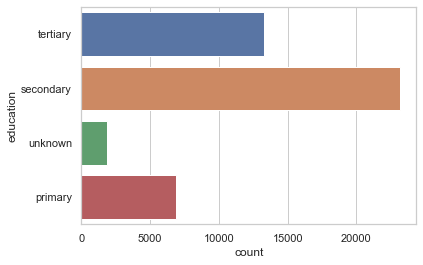

In [21]:
sns.countplot(y="education", data=data)

In [22]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [23]:
# OBSERVATION : 51% have secondary education; 29% have tertiary education, 15% have primary education and 4% are unknown

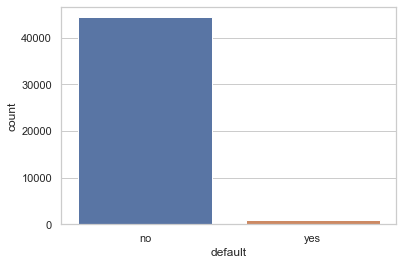

In [24]:
sns.countplot(x="default", data=data)

In [25]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [26]:
# OBSERVATION : 98% of customers have not defaulted their loans while approx 2% have defaulted their loans

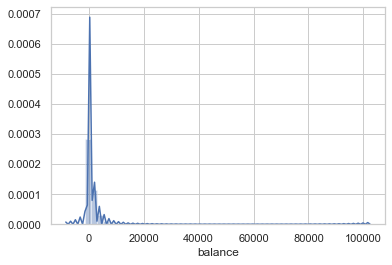

In [27]:
sns.distplot(data['balance'])
plt.show()

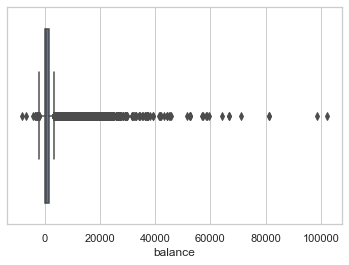

In [28]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["balance"])

In [29]:
# OBSERVATION :
# balance of the customers lie between -8019 to 102127 with a median balance of 448.00. Data has high outliers
# IQR = 1356 ; Q1 = 72 ; Q3 = 1428 
# lower outliers = Q1 - (1.5 x IQR) =  -1962
# higher outlier = Q3 + (1.5) x IQR) = 3462
# balance values under -1962 and over 3462 are outliers.

In [30]:
balance_outliers_df = pd.DataFrame()
balance_outliers_df = data[(data.balance < -1962) | (data.balance > 3462)]

In [31]:
balance_outliers_df.shape

(4729, 17)

In [32]:
# OBSERVATION : There are 4729 customer accounts with outlier balance.10% of the data has outlier balances

In [33]:
data[data['balance']<0].shape

(3766, 17)

In [34]:
# OBSERVATION : 3766 customers have -ve account balances 41,445 customers have a positive account balance

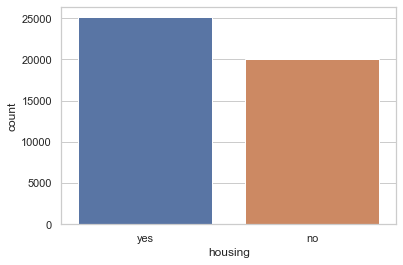

In [35]:
sns.countplot(x="housing", data=data)

In [36]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [37]:
# OBSERVATION : 55% of the customers have a housing loan while 45% of the customers do not have a housing loan

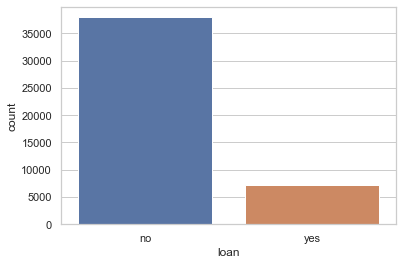

In [38]:
sns.countplot(x="loan", data=data)

In [39]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [40]:
# OBSERVATION : 84% of the customers have a personal loan while 16% do not have a personal loan

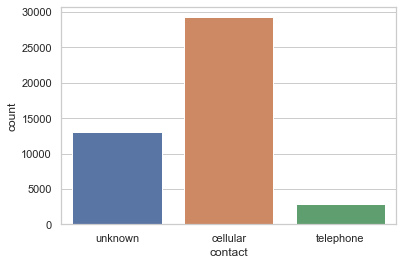

In [41]:
sns.countplot(x="contact", data=data)

In [42]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [43]:
# OBSERVATION : 64% of the customers were contacted using celluar, 6.5% using telephone and 28.7% are not known

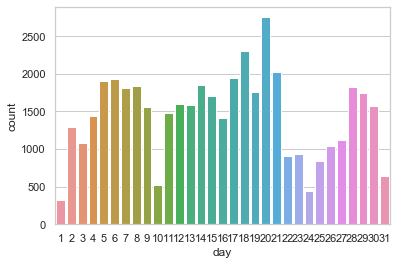

In [44]:
sns.countplot(x="day", data=data)

In [45]:
# OBSERVATION : Customers were contacted across every day of the month.

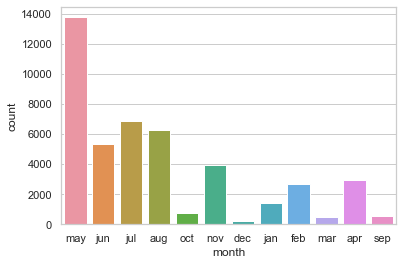

In [46]:
sns.countplot(x="month", data=data)

In [47]:
# OBSERVATION : Most customers were contacted in the month of May with the least being in December.

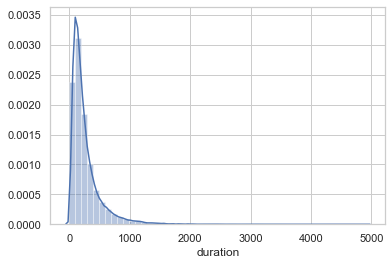

In [48]:
sns.distplot(data['duration'])
plt.show()

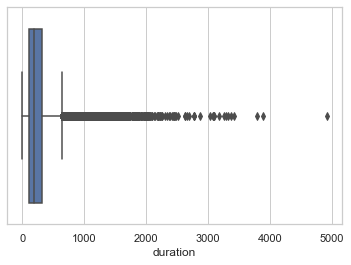

In [49]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["duration"])

In [50]:
# OBSERVATION :
# duration lie between 0 to 4918 seconds with a median duration of 180.00 seconds. Data has high outliers
# IQR = 216 ; Q1 = 103 ; Q3 = 319 
# lower outliers = Q1 - (1.5 x IQR) =  -221
# higher outlier = Q3 + (1.5) x IQR) = 643
# balance values under -221 and over 643 are outliers.

In [51]:
duration_outliers_df = pd.DataFrame()
duration_outliers_df = data[(data.duration < -221) | (data.duration > 643)]

In [52]:
duration_outliers_df.shape

(3235, 17)

In [53]:
# There are 3235 records with duration as outliers. 

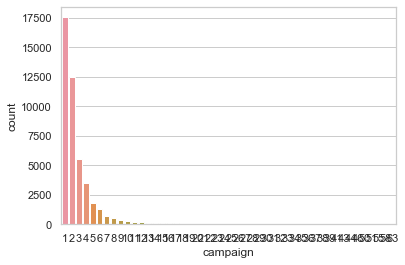

In [54]:
sns.countplot(x="campaign", data=data)

In [55]:
data['campaign'].value_counts().head()

1    17544
2    12505
3     5521
4     3522
5     1764
Name: campaign, dtype: int64

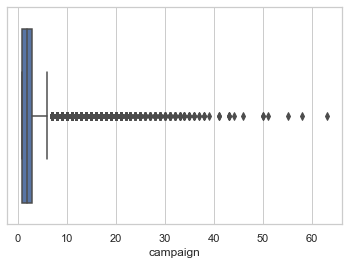

In [56]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["campaign"])

In [57]:
# OBSERVATION : Most customers were contacted less than 4 times with the highest frequency of contact being 1 or 2 contacts.

In [58]:
data[data['campaign']<1].shape

(0, 17)

In [59]:
# OBSERVATION : There were no customers who were not contacted at all. All customers were contacted at least once.

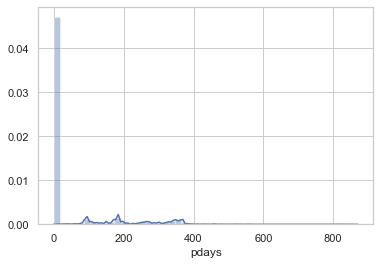

In [60]:
sns.distplot(data['pdays'])
plt.show()

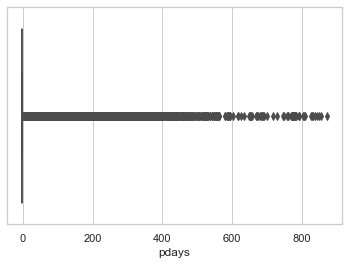

In [61]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["pdays"])

In [62]:
data['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [63]:
# There are 36954 cusstomers with a value of -1 for pdays. Signifant data on this column is unusable

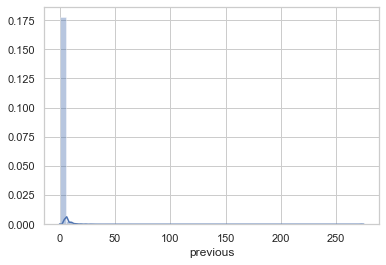

In [64]:
sns.distplot(data['previous'])
plt.show()

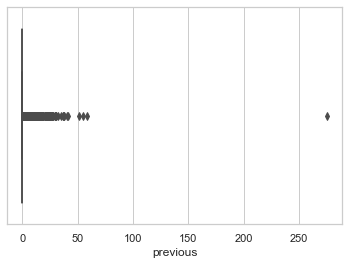

In [65]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["previous"])

In [66]:
data['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [67]:
# 36954 customers were not contacted before this campaign and for this client

In [68]:
# check the relationship between the 'Target' variable and the # of previous contacts

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


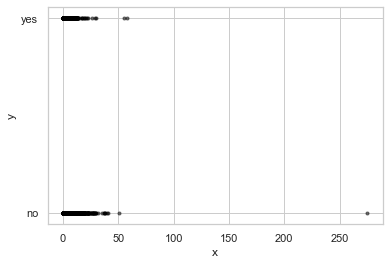

In [69]:
y=data['Target']
x=data['previous']
area = np.pi*3
colors = (0,0,0)
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [70]:
# We do not see increased clustering of 'Target' with increasing number of previous contacts. 
# 81% of the data shows zero previous calls. 13% is within 1 to 3 calls. Approx. 5% with higher than 3 calls.
# We could model this as a binary variable with ‘No previous contact’ or ‘previously contacted’. 
# No previous contact = 0 ; Previously contacted = 1

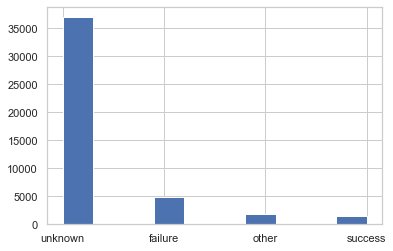

In [71]:
data['poutcome'].hist()

In [72]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [73]:
# OBSERVATION : For 81.7% of the customers, the outcome of the previous campaign is not known. Outcome is known for 14% of the customers.

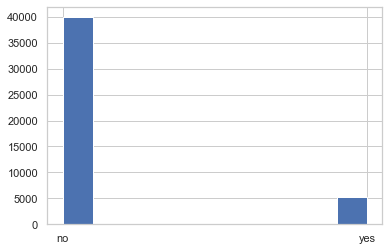

In [74]:
data['Target'].hist()

In [75]:
data['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [76]:
# OBSERVATION : Approximately 88% of the customers did not subscribe to the term deposit while 12% of the customers did. 

# Summary of Univariate Analysis

In [77]:
# OBSERVATION : there are 45211 rows and 17 attributes/columns
# Age Values under 10.5 years or over 70.5 years are outliers. 
# There are 487 rows of data for customers with age outliers. Approx. 1.07% of data. 
# Most customers have either blue collar, management, technician, admin or services jobs
# There are 288 customers whose jobs are not known
# Married customers : 60% ; single : 28% and divorced are 11%
# 51% have secondary education; 29% have tertiary education, 15% have primary education and 4% are unknown
# 98% of customers have not defaulted their loans while approx 2% have defaulted their loans
# balance values under -1962 and over 3462 are outliers.
# There are 4729 customer accounts with outlier balance.10% of the data has outlier balances
# 3766 customers have -ve account balances 41,445 customers have a positive account balance
# 55% of the customers have a housing loan while 45% of the customers do not have a housing loan
# 84% of the customers have a personal loan while 16% do not have a personal loan
# 64% of the customers were contacted using celluar, 6.5% using telephone and 28.7% are not known
# Customers were contacted across every day of the month.
# Most customers were contacted in the month of May with the least being in December.
# Most customers were contacted less than 4 times with the highest frequency of contact being 1 or 2 contacts.
# There were no customers who were not contacted at all. All customers were contacted at least once.
# There are 36954 cusstomers with a value of -1 for pdays. Signifant data on this column is unusable
# 36954 customers were not contacted before this campaign and for this client
# For 81.7% of the customers, the outcome of the previous campaign is not known. Outcome is known for 14% of the customers.
# Approximately 88% of the customers did not subscribe to the term deposit while 12% of the customers did. 


# Bivariate and Multi-variate Analysis

In [78]:
# Determine Correlation between numeric columns

In [79]:
# Convert the "Target" variable to a numeric column. Yes will be '1' and No will be '0'

In [80]:
data['Target'] = data['Target'].map({'yes': 1, 'no': 0})

In [81]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,Target
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
Target,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


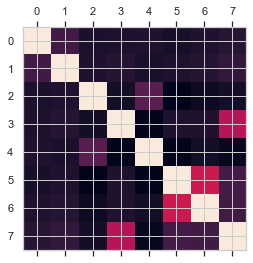

In [82]:
plt.matshow(data.corr())
plt.show()

In [83]:
# Correlation across the numeric attributes are weak or non existent.

In [84]:
# There is some correlation between 'pdays' and 'previous'

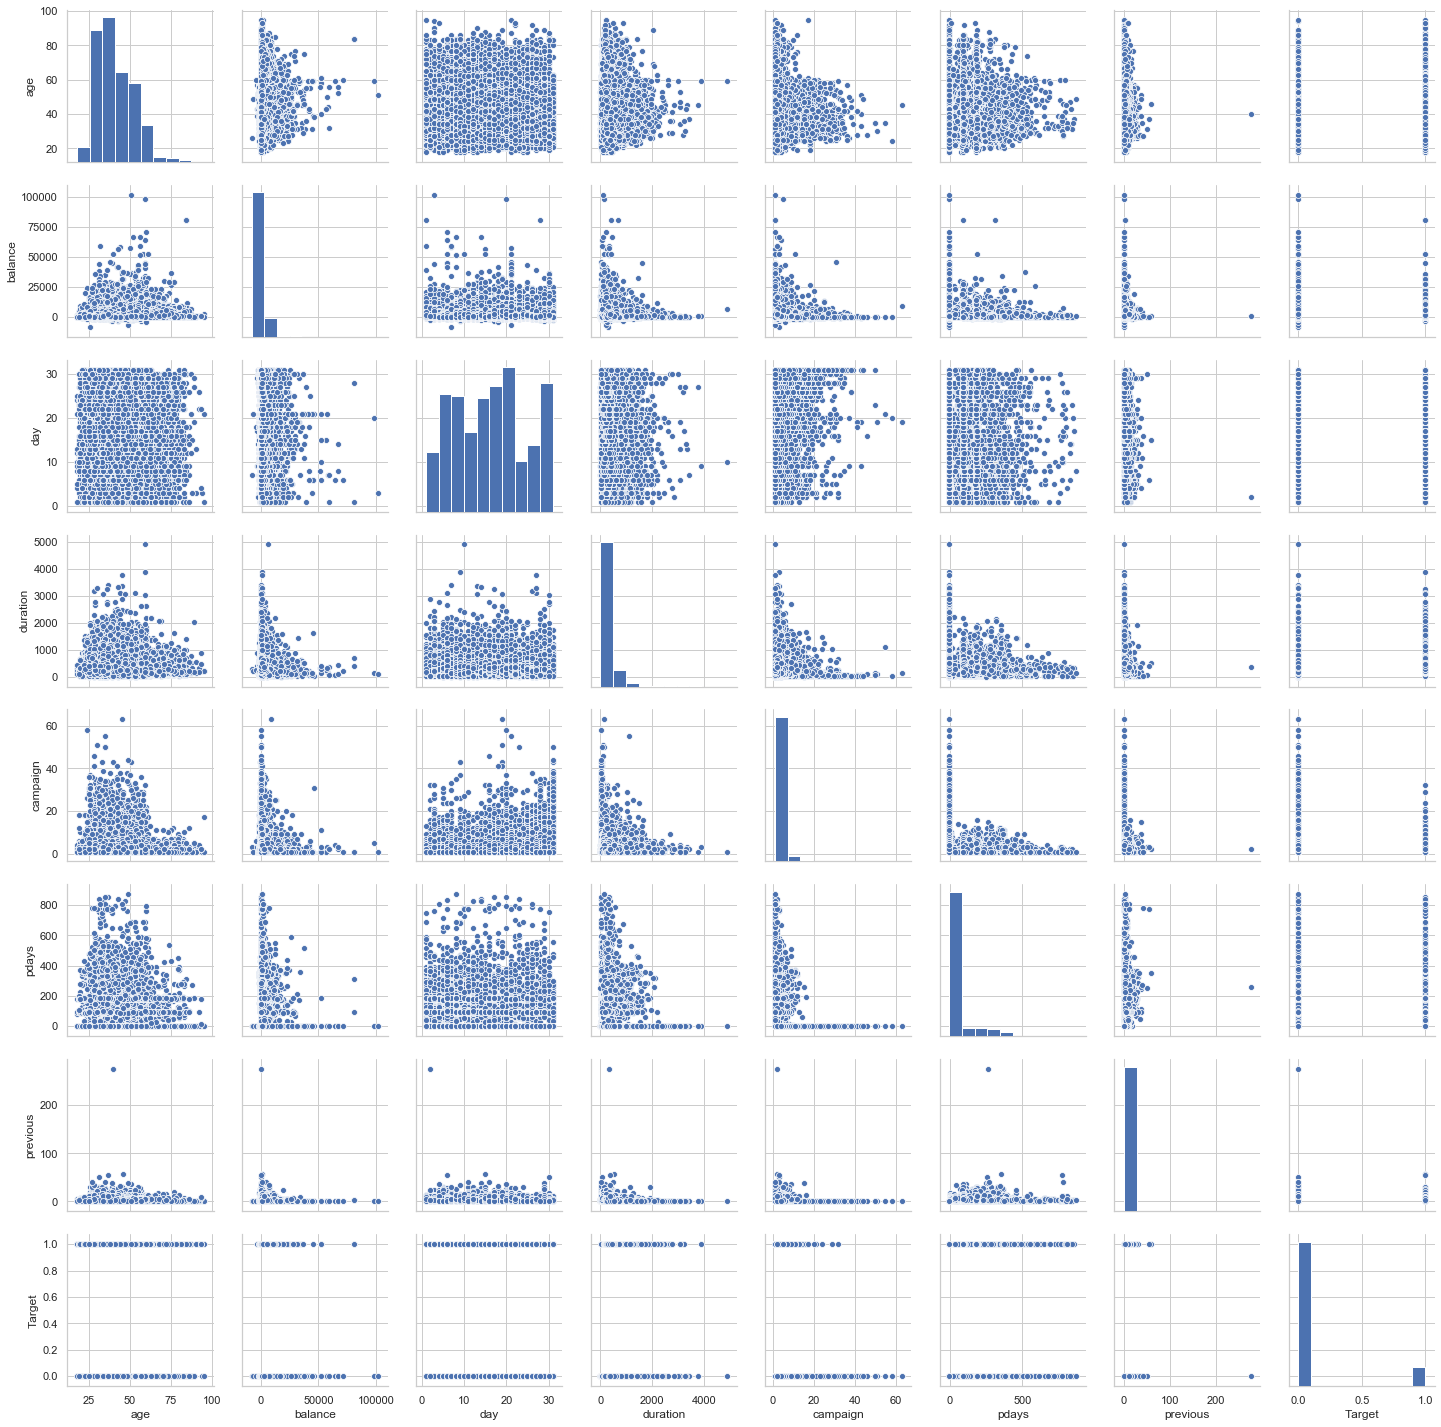

In [85]:
sns.pairplot(data)

In [86]:
# Let us understand the association between the "Target" attribute and the categorical variables. 
# We will build contingency tables to understand these associations

In [87]:
marital_Target_cont_tbl = pd.crosstab(index=data["marital"],columns=data['Target'])
marital_Target_cont_tbl.apply(lambda r: (r/r.sum())*100, axis=1)

Target,0,1
marital,,
divorced,88.054542,11.945458
married,89.876534,10.123466
single,85.050821,14.949179


In [88]:
# OBSERVATION :Marital status does not show any significant association with the Target attribute. Evenly distributed for each value of marital status

In [89]:
education_Target_cont_tbl = pd.crosstab(index=data["education"],columns=data['Target'])
education_Target_cont_tbl.apply(lambda r: (r/r.sum())*100, axis=1)

Target,0,1
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


In [90]:
# OBSERVATION : Customers with only primary education are less preferred targets. Secondary and tertiary education customers are higher targets

In [91]:
default_Target_cont_tbl = pd.crosstab(index=data["default"],columns=data['Target'])
default_Target_cont_tbl.apply(lambda r: (r/r.sum())*100, axis=1)

Target,0,1
default,,
no,88.203892,11.796108
yes,93.619632,6.380368


In [92]:
# OBSERVATION : Customers who have defaulted in the past are less likely to be targeted. 

In [93]:
housing_Target_cont_tbl = pd.crosstab(index=data["housing"],columns=data['Target'])
housing_Target_cont_tbl.apply(lambda r: (r/r.sum())*100, axis=1)

Target,0,1
housing,,
no,83.297645,16.702355
yes,92.300040,7.699960


In [94]:
# OBSERVATION : Customers who do not have housing loan are more likely to be targeted than customers who have a housing loan

In [95]:
loan_Target_cont_tbl = pd.crosstab(index=data["loan"],columns=data['Target'])
loan_Target_cont_tbl.apply(lambda r: (r/r.sum())*100, axis=1)

Target,0,1
loan,,
no,87.344273,12.655727
yes,93.318609,6.681391


In [96]:
# OBSERVATION : Customers who do not have personal loan are more likely to be targeted than customers who have a personal loan

In [97]:
contact_Target_cont_tbl = pd.crosstab(index=data["contact"],columns=data['Target'])
contact_Target_cont_tbl.apply(lambda r: (r/r.sum())*100, axis=1)

Target,0,1
contact,,
cellular,85.081100,14.918900
telephone,86.579491,13.420509
unknown,95.929339,4.070661


In [98]:
# OBSERVATION : Contact through Cellular or telephone has little or no bearing on the decision to target the customers

In [99]:
month_Target_cont_tbl = pd.crosstab(index=data["month"],columns=data['Target'])
month_Target_cont_tbl.apply(lambda r: (r/r.sum())*100, axis=1)

Target,0,1
month,,
apr,80.320600,19.679400
aug,88.986714,11.013286
dec,53.271028,46.728972
feb,83.352208,16.647792
jan,89.878831,10.121169
jul,90.906454,9.093546
jun,89.777195,10.222805
mar,48.008386,51.991614
may,93.280546,6.719454


In [100]:
# OBSERVATION : Customers targeted in the month of Dec, March, Oct or Sept are higher targets for this campaign

In [101]:
poutcome_Target_cont_tbl = pd.crosstab(index=data["poutcome"],columns=data['Target'])
poutcome_Target_cont_tbl.apply(lambda r: (r/r.sum())*100, axis=1)

Target,0,1
poutcome,,
failure,87.390329,12.609671
other,83.315217,16.684783
success,35.274653,64.725347
unknown,90.838497,9.161503


In [102]:
# OBSERVATION : Customers with a prior campaign success are higher targets for this campaign

# Summary of Bi-variate/Multi-variate analysis

In [103]:
# Correlation across the numeric attributes are weak or non existent.
# There is some correlation between 'pdays' and 'previous
# Marital status does not show any significant association with the Target attribute. Evenly distributed for each value of marital status
# Customers who have defaulted in the past are less likely to be targeted. 
# Customers who do not have housing loan are more likely to be targeted than customers who have a housing loan
# Customers who do not have personal loan are more likely to be targeted than customers who have a personal loan
# Contact through Cellular or telephone has little or no bearing on the decision to target the customers
# Customers targeted in the month of Dec, March, Oct or Sept are higher targets for this campaign
# Customers with a prior campaign success are higher targets for this campaign

# Transform data 

In [104]:
# Convert the categorical variables to numerical values

In [105]:
data_transformed = pd.DataFrame()
data_transformed = data.copy()
data_transformed['month'] = data_transformed['month'].map({'jan': 1, 'feb': 2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
data_transformed['default']=data_transformed['default'].map({'yes':1, 'no':0})
data_transformed['housing']=data_transformed['housing'].map({'yes':1, 'no':0})
data_transformed['loan']=data_transformed['loan'].map({'yes':1, 'no':0})

In [106]:
# Perform one hot encoding on the categorical variables

In [107]:
encoded_cols = pd.get_dummies(data_transformed,columns=None)
data_transformed = data_transformed.merge(encoded_cols)

In [108]:
data_transformed.shape

(45211, 43)

In [109]:
data_transformed.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [110]:
# Drop the encoded columns

In [111]:
data_transformed.drop('job',axis=1,inplace=True)
data_transformed.drop('marital',axis=1,inplace=True)
data_transformed.drop('education',axis=1,inplace=True)
data_transformed.drop('contact',axis=1,inplace=True)
data_transformed.drop('poutcome',axis=1,inplace=True)

In [112]:
# Keep the age outlier data as is. Has nearly equal customers that are targets 
# 0.6% of customer’s jobs are not known. Small contamination. No treatment required. 
# marital status is known for all customers. No data issues.
# education status of 4% of the customers is not known. Keep data as is. 
# default – no data issues. Keep as is. Default status for all customers is known.
# 10% of the customers have outlier balance data. Accounts have -ve balances as well. 
# balance attribute can be converted to a categorical variable as ‘Low, Medium, High’. Low = <= 25th percentile ; Medium : > 25th percentile, <= 75th percentile ; High > 75th percentile. Set Low = 1; Medium = 2 and High = 3.
# housing – no data issues. Clean data.
# loan – no data issues. Clean data. 
# contact – Details not known for 28% of the customers. Keep as is. The attribute may not have significant correlation with the ‘Target’. Missing data will not affect outcome.
# day – no data issues. Clean data. 
# month – no data issues. Clean data.
# duration – 7% of the data is outliers. Can be converted to a categorical variable as Low, Medium and High. Low is <= 25th percentile, Medium > 25th percentile and <= 75th percentile ; High > 75th percentile. Set Low = 1, Medium = 2 and High = 3
# campaign = no data issues. Clean data.
# pdays – 81% of the data has a -1 value. This is an incorrect value for the number of days that passed by before the customer was contacted. With 81% data being incorrect, this column will not offer much insight. Drop the column from the model. 
# previous – 81% of the data shows zero previous calls. 13% is within 1 to 3 calls. Approx. 5% with higher than 3 calls. We could model this as a binary variable with ‘No previous contact’ or ‘previously contacted’. No previous contact = 0 ; Previously contacted = 1
# poutcome : For 82% of the customers, previous outcome is not known. This may not be a great indicator for modelling as the success or failure is only known for 14% of the customers. This attribute can be dropped from the model.

In [113]:
# balance attribute can be converted to a categorical variable as ‘Low, Medium, High’. Low = <= 25th percentile ; Medium : > 25th percentile, <= 75th percentile ; High > 75th percentile. Set Low = 1; Medium = 2 and High = 3.

In [114]:
balance_q1 = data_transformed['balance'].quantile(q=0.25,interpolation="linear")
balance_median = data_transformed['balance'].quantile(q=0.5,interpolation="linear")
balance_q3 = data_transformed['balance'].quantile(q=0.75,interpolation="linear")

In [115]:
print(balance_q1)
print(balance_median)
print(balance_q3)

72.0
448.0
1428.0


In [116]:
data_transformed['balance'].loc[(data_transformed['balance'] <= balance_q1)] = 1
data_transformed['balance'].loc[(data_transformed['balance']  > balance_q1) & (data_transformed['balance']  <= balance_q3)] = 2
data_transformed['balance'].loc[(data_transformed['balance'] > balance_q3)] = 3

C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [117]:
data_transformed['balance'].value_counts()

2    22597
1    11317
3    11297
Name: balance, dtype: int64

In [118]:
# duration – 7% of the data is outliers. Can be converted to a categorical variable as Low, Medium and High. Low is <= 25th percentile, Medium > 25th percentile and <= 75th percentile ; High > 75th percentile. Set Low = 1, Medium = 2 and High = 3

In [119]:
duration_q1 = data_transformed['duration'].quantile(q=0.25,interpolation="linear")
duration_median = data_transformed['duration'].quantile(q=0.5,interpolation="linear")
duration_q3 = data_transformed['duration'].quantile(q=0.75,interpolation="linear")

In [120]:
print(duration_q1)
print(duration_median)
print(duration_q3)

103.0
180.0
319.0


In [121]:
data_transformed['duration'].loc[(data_transformed['duration'] <= duration_q1)] = 1
data_transformed['duration'].loc[(data_transformed['duration']  > duration_q1) & (data_transformed['duration']  <= duration_q3)] = 2
data_transformed['duration'].loc[(data_transformed['duration'] > duration_q3)] = 3

In [122]:
data_transformed['duration'].value_counts()

2    22575
1    11375
3    11261
Name: duration, dtype: int64

In [123]:
# pdays – 81% of the data has a -1 value. This is an incorrect value for the number of days that passed by before the customer was contacted. With 81% data being incorrect, this column will not offer much insight. Drop the column from the model. 

In [124]:
data_transformed.drop('pdays',axis=1,inplace=True)

In [125]:
# previous – 81% of the data shows zero previous calls. 13% is within 1 to 3 calls. Approx. 5% with higher than 3 calls. We could model this as a binary variable with ‘No previous contact’ or ‘previously contacted’. No previous contact = 0 ; Previously contacted = 1

In [126]:
data_transformed['previous'].loc[(data_transformed['previous'] > 0)] = 1

In [127]:
data_transformed['previous'].value_counts()

0    36954
1     8257
Name: previous, dtype: int64

In [128]:
# poutcome : For 82% of the customers, previous outcome is not known. This may not be a great indicator for modelling as the success or failure is only known for 14% of the customers. This attribute can be dropped from the model.

In [129]:
data_transformed.drop('poutcome_failure',axis=1,inplace=True)
data_transformed.drop('poutcome_success',axis=1,inplace=True)
data_transformed.drop('poutcome_unknown',axis=1,inplace=True)
data_transformed.drop('poutcome_other',axis=1,inplace=True)

In [132]:
data_transformed.head()

,age,default,balance,housing,loan,day,month,duration,campaign,previous,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,3,1,0,5,5,2,1,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,1,1,0,5,5,2,1,0,...,0,0,1,0,1,0,0,0,0,1
2,33,0,1,1,1,5,5,1,1,0,...,0,1,0,0,1,0,0,0,0,1
3,47,0,3,1,0,5,5,1,1,0,...,0,1,0,0,0,0,1,0,0,1
4,33,0,1,0,0,5,5,2,1,0,...,0,0,1,0,0,0,1,0,0,1


In [133]:
data_transformed.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'previous', 'Target', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown'],
      dtype='object')

In [134]:
data_transformed.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
previous               int64
Target                 int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
dtype: object

# Recursive Feature elimination to determine the most significant features

In [135]:
data_vars=data_transformed.columns.values.tolist()

In [136]:
y=data_transformed['Target']
X=[i for i in data_vars if i not in y]
logreg = LogisticRegression(solver='liblinear')
rfe = RFE(logreg, 25)
data_X = data_transformed[X]
data_y = data_transformed['Target']
rfe = rfe.fit(data_X, data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True False False  True False  True  True  True
  True  True  True  True False  True  True False  True  True False  True
  True  True  True  True  True  True  True  True  True]
[8 2 1 1 1 9 5 1 7 1 1 1 1 1 1 1 3 1 1 6 1 1 4 1 1 1 1 1 1 1 1 1 1]


# Create the training set and test set and run logistic regression with unbalanced data

In [137]:
data_transformed['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [138]:
# 11.69% of the data has a Target value of 'Yes' while 88% of data has a Target value of 'No'
# The data is unbalanced with a ratio of 1:8.
# We will attempt to develop the model with UNBALANCED data and then BALANCE it using SMOTE algorithm to rebuild the model

In [139]:
X_unb = data_transformed.loc[:, data_transformed.columns != 'Target']
y_unb = data_transformed.loc[:, data_transformed.columns == 'Target']

In [140]:
X_train_unb, X_test, y_train_unb, y_test = train_test_split(X_unb, y_unb, test_size=0.3, random_state=0)
columns = X_train_unb.columns

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [142]:
logreg_unb = LogisticRegression(solver='liblinear')

In [143]:
logreg_unb.fit(X_train_unb, y_train_unb.values.ravel()) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
y_pred_unb = logreg_unb.predict(X_test)

In [145]:
print('Accuracy of logistic regression classifier on UNBALANCED test set: {:.2f}'.format(logreg_unb.score(X_test, y_test)))

Accuracy of logistic regression classifier on UNBALANCED test set: 0.89


In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
confusion_matrix_unb = confusion_matrix(y_test, y_pred_unb)
print(confusion_matrix_unb)

[[11737   232]
 [ 1319   276]]


Text(0.5, 1, 'Confusion Matrix - Unbalanced Data')

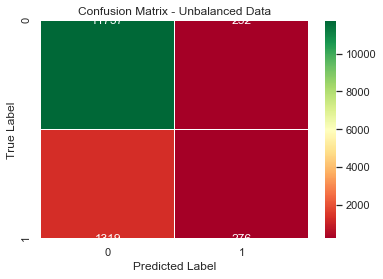

In [148]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
#from sklearn.metrics import confusion_matrix
#matrix = confusion_matrix(y_test, pred)
sns.heatmap(confusion_matrix_unb,annot=True,fmt="",cmap='RdYlGn',linewidths=0.4,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Unbalanced Data')

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_unb))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.54      0.17      0.26      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



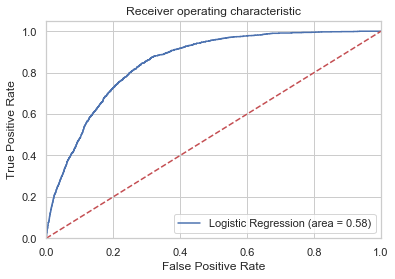

In [150]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_unb = roc_auc_score(y_test, logreg_unb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_unb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_unb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Create logistic regression model using balanced categories. Balance data using SMOTE technique

In [151]:
# Since our data for customers who are Targets is unblanced from the customers who are not Targets
# We will use SMOTE (Synthetic Minority Oversampling Technique) to create synthetic samples and balance categories
# Only the training data will be subjected to SMOTE to generate synthetic training data
# The accuracy with unbalanced data is 0.96. However, due to unbalanced data, there is likelihood of bias towards 
# predicting that a customer may not take a personal loan. 

In [152]:
X_b = data_transformed.loc[:, data_transformed.columns != 'Target']
y_b = data_transformed.loc[:, data_transformed.columns == 'Target']

In [153]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

In [154]:
X_train_b, X_test, y_train_b, y_test = train_test_split(X_b, y_b, test_size=0.3, random_state=0)
columns = X_train_b.columns

In [155]:
X_train_b.shape

(31647, 32)

In [156]:
y_train_b.shape

(31647, 1)

In [157]:
X_test.shape

(13564, 32)

In [158]:
y_test.shape

(13564, 1)

In [159]:
os_data_X,os_data_y=os.fit_sample(X_train_b, y_train_b)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [160]:
os_data_X.shape

(55906, 32)

In [161]:
os_data_X.head()

,age,default,balance,housing,loan,day,month,duration,campaign,previous,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,2,0,0,18,11,2,1,0,...,0,1,0,1,0,0,0,0,0,1
1,55,0,2,0,0,21,8,2,2,0,...,0,1,0,0,0,0,1,1,0,0
2,50,0,2,1,0,7,5,2,2,0,...,0,1,0,0,1,0,0,0,0,1
3,43,0,3,1,0,17,7,1,6,0,...,0,1,0,1,0,0,0,1,0,0
4,53,0,2,1,0,16,5,3,6,0,...,1,0,0,0,0,1,0,0,0,1


In [162]:
os_data_y.shape

(55906, 1)

In [163]:
os_data_y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [164]:
print("length of oversampled data is ",len(os_data_X))
print("Number of no Personal Loans in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of Personal Loans",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no Personal Loans data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of Personal Loans data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  55906
Number of no Personal Loans in oversampled data 27953
Number of Personal Loans 27953
Proportion of no Personal Loans data in oversampled data is  0.5
Proportion of Personal Loans data in oversampled data is  0.5


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [166]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(os_data_X, os_data_y.values.ravel()) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
y_pred = logreg.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F02EFE608>]],
      dtype=object)

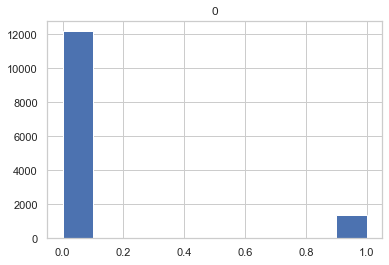

In [168]:
y_pred_df.hist()

In [169]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [170]:
from sklearn.metrics import confusion_matrix

In [171]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [172]:
print(confusion_matrix)

[[11180   789]
 [ 1009   586]]


Text(0.5, 1, 'Confusion Matrix')

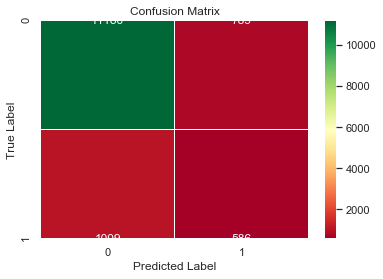

In [173]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
#from sklearn.metrics import confusion_matrix
#matrix = confusion_matrix(y_test, pred)
sns.heatmap(confusion_matrix,annot=True,fmt="",cmap='RdYlGn',linewidths=0.4,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     11969
           1       0.43      0.37      0.39      1595

    accuracy                           0.87     13564
   macro avg       0.67      0.65      0.66     13564
weighted avg       0.86      0.87      0.86     13564



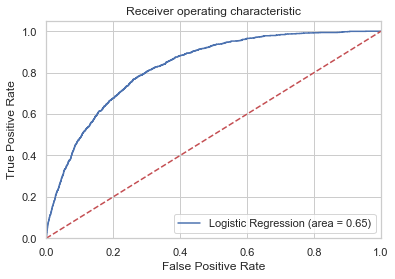

In [175]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Build the ensemble models 

# Create a Decision Tree (Overfitted)

In [176]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from os import system

In [177]:
X = data_transformed.drop("Target", axis=1)
y = data_transformed.pop("Target")

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

In [179]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [180]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9996524157108099
0.8527720436449425


In [181]:
# The model performs well on training data and has a score of 100% while the testing data has a score of 87%.
# This demonstrates overfitting within the model.

0.8527720436449425


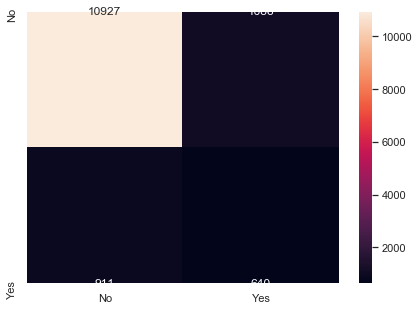

In [182]:
print(dTree.score(X_test,y_test))
y_predict = dTree.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                     columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [183]:
train_char_label = ['No', 'Yes']
Term_Deposit_File = open('Term_Deposit.dot', 'w')
dot_data = tree.export_graphviz(dTree, out_file=Term_Deposit_File, feature_names = list(X_train))
Term_Deposit_File.close()

In [184]:
Term_Deposit_File

<_io.TextIOWrapper name='Term_Deposit.dot' mode='w' encoding='cp1252'>

In [185]:
# Attempted to visualize the dTree model. Due to overfitting, there are too many nodes on the tree and the visualization is aborting. 
# Will visualize the pruned tree. 

# Create a Decision Tree (Regularized / Pruned)

In [186]:
# Reducing Over fitting (Regularization) - Starting with a max_deoth of '3'

In [187]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8818845388188454
0.8856531996461221


In [188]:
# Importance of features in tree building 
print(pd.DataFrame(dTreeR.feature_importances_, columns=["Imp"], index=X_train.columns))

                          Imp
age                  0.037472
default              0.000000
balance              0.000000
housing              0.139804
loan                 0.000000
day                  0.000000
month                0.000000
duration             0.620540
campaign             0.000000
previous             0.086585
job_admin.           0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
job_unknown          0.000000
marital_divorced     0.000000
marital_married      0.005201
marital_single       0.000000
education_primary    0.000000
education_secondary  0.000000
education_tertiary   0.000000
education_unknown    0.000000
contact_cellular     0.000000
contact_telephone    0.000000
contact_unknown      0.110397


In [189]:
# The most significant attributes are : age, housing, duration, previous, marital and contact

0.8856531996461221


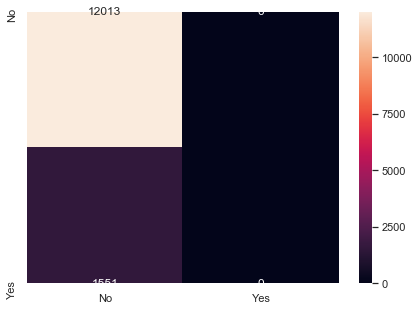

In [190]:
print(dTreeR.score(X_test,y_test))
y_predict = dTreeR.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                     columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

# Visualize the pruned tree

In [191]:
from sklearn.tree import export_graphviz
export_graphviz(dTreeR, out_file='dTreeR.dot')

In [192]:
from IPython.display import Image

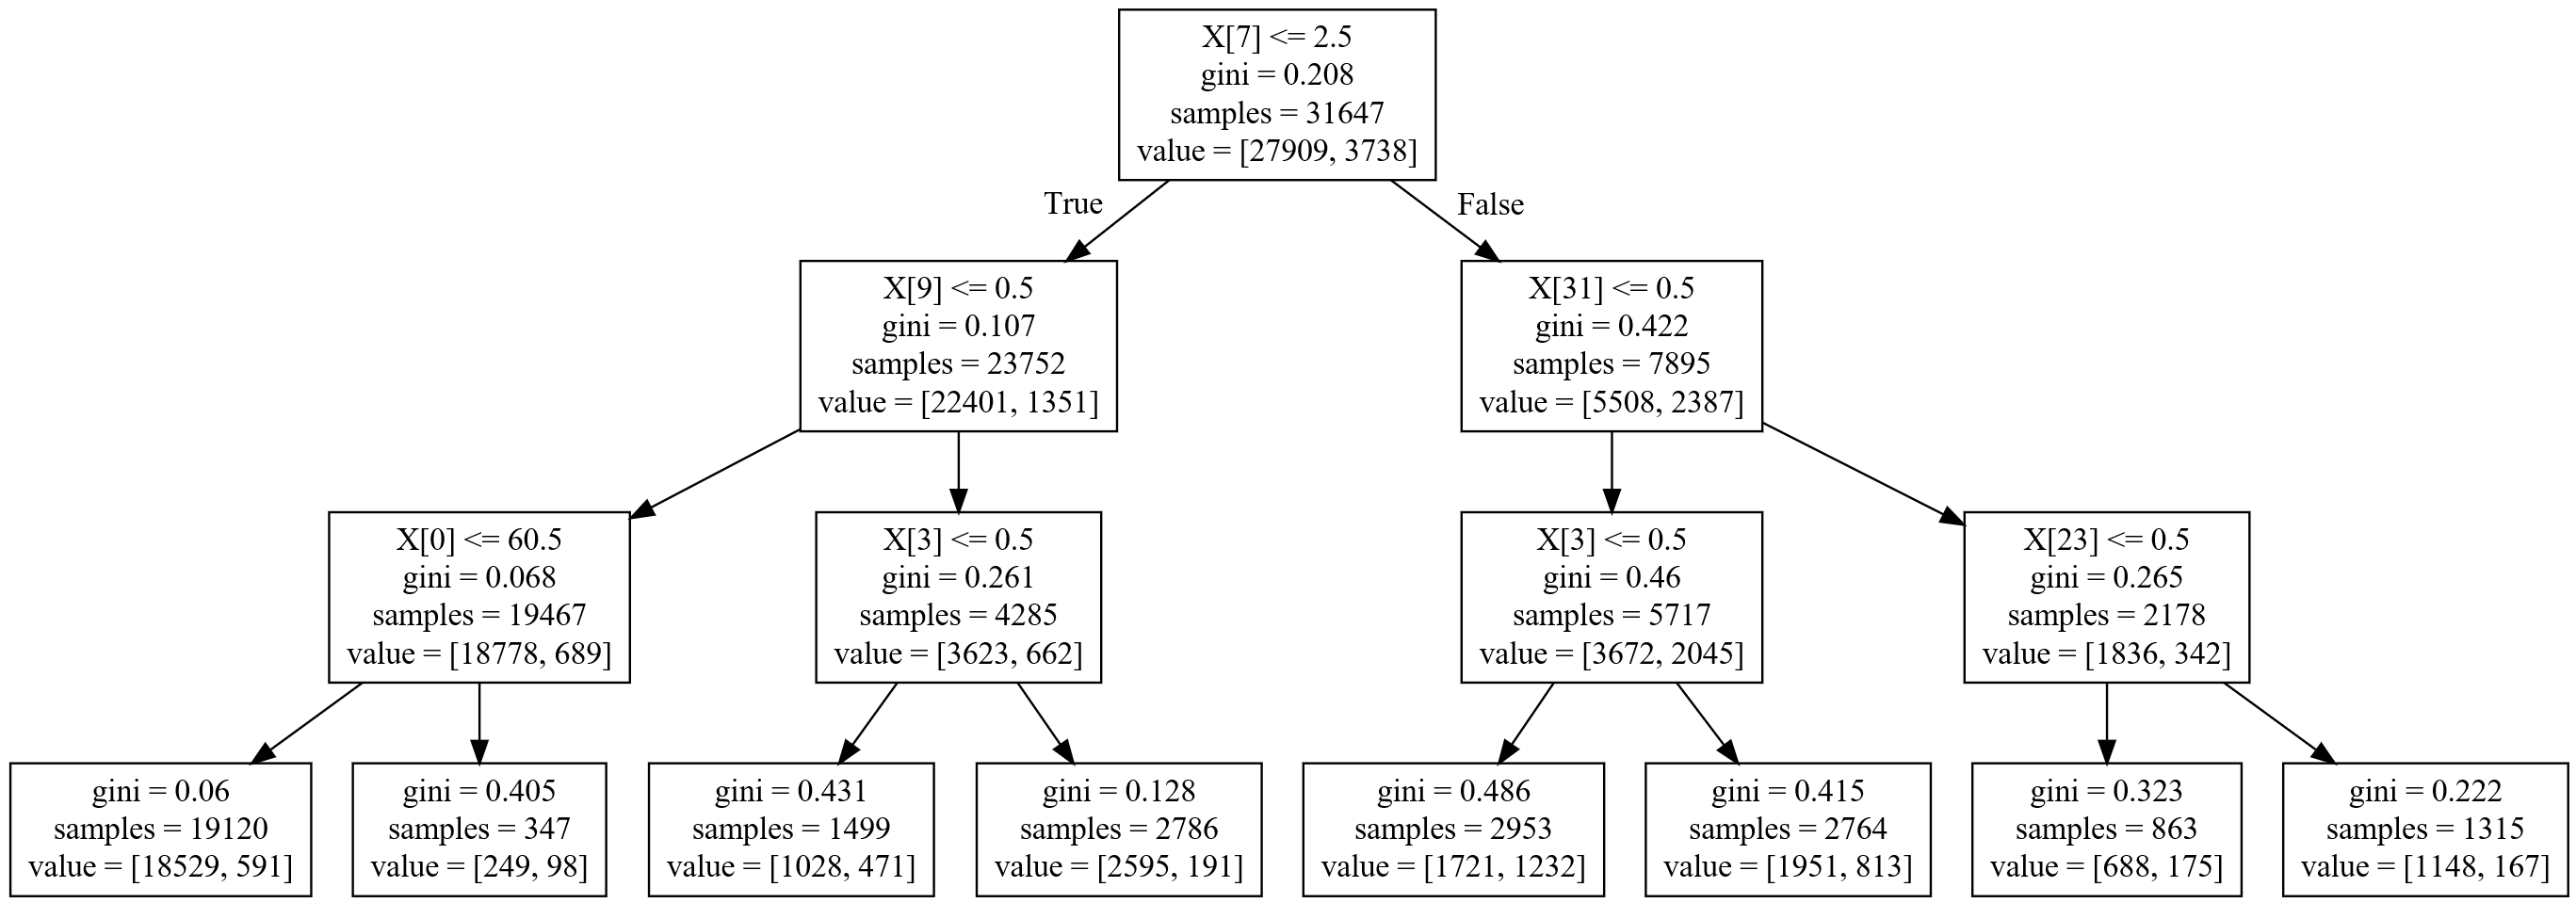

In [193]:
Image(filename='dTreeR.png') 

# Vary the depth of the pruned tree to determine the impact on predictability accuracy - Tuning Hyperparameters to find the optimal max_depth

In [194]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from os import system

In [195]:
scores_df = pd.DataFrame()
for d in range(1,50,1):
    dTree_pruned = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=1)
    dTree_pruned.fit(X_train, y_train)
    scores_df = scores_df.append({'max_depth': d, 'score': dTree_pruned.score(X_test,y_test)}, ignore_index=True)

In [196]:
scores_df.head()

,max_depth,score
0,1.0,0.885653
1,2.0,0.885653
2,3.0,0.885653
3,4.0,0.887717
4,5.0,0.888160


In [197]:
scores_df.dtypes

max_depth    float64
score        float64
dtype: object

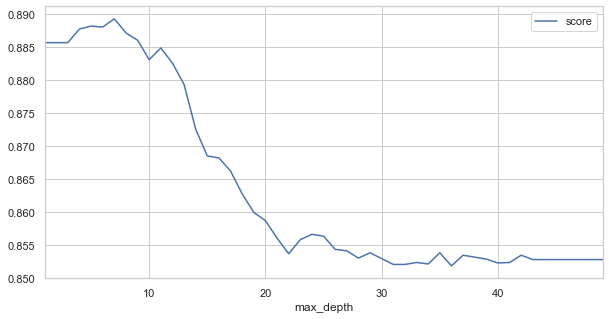

In [198]:
scores_df.plot(x='max_depth', y='score' ,figsize=(10,5), grid=True  )

In [199]:
scores_df[scores_df['score'] == scores_df['score'].max()]

,max_depth,score
6,7.0,0.889266


In [200]:
# The score of the decision tree (overfitted with no pruning) has scores of 99% with the training data and 85% with the test data.
# Since the data is overfitted, the score with training data is likely to be high. The overall prediction accuracy is 85%
# When the model was pruned to fit up to a depth of 3 nodes, the training and test datasets had an accuracy of 88%. 
# To optimize the max_depth, we ran the pruned model varying the max_depth from 1 to 50, stepping it up by 1 each time. 
# The best score was achieved with a max depth of 7. The score was 88.9%. This is a gain from 88.5% to 88.9%.
# For the sake of simplicity, we could also stay with a lower max_depth since the gain in score is not significantly high.
# Increasing the max_depth beyond a threshold does not increase the accuracy of the model.


# Implement Bagging on the decision tree to improve performance

In [201]:
from sklearn.ensemble import BaggingClassifier
bgcl50 = BaggingClassifier(base_estimator=dTree, n_estimators=50, random_state=1)
bgcl50 = bgcl50.fit(X_train, y_train)

0.8856531996461221


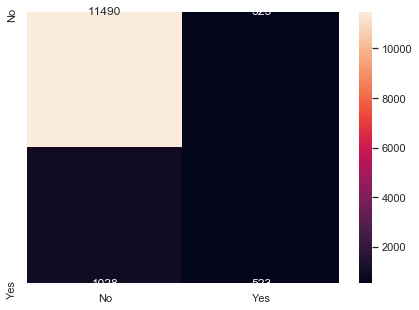

In [202]:
y_predict = bgcl50.predict(X_test)
print(bgcl50.score(X_test, y_test))

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                     columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

# Vary the estimators for bagging and assess the impact on the model score. Tuning Hyperparameters to find best estimator value for the model

In [203]:
scores_df_bgcl = pd.DataFrame()
for d in range(1,300,50):
    bgcl_models = BaggingClassifier(base_estimator=dTree, n_estimators=d, random_state=1)
    bgcl_models = bgcl_models.fit(X_train, y_train)
    scores_df_bgcl = scores_df_bgcl.append({'n_estimators': d, 'score': bgcl_models.score(X_test,y_test)}, ignore_index=True)

In [208]:
scores_df_bgcl.head()

,n_estimators,score
0,1.0,0.852919
1,51.0,0.884842
2,101.0,0.885579
3,151.0,0.886169
4,201.0,0.885727


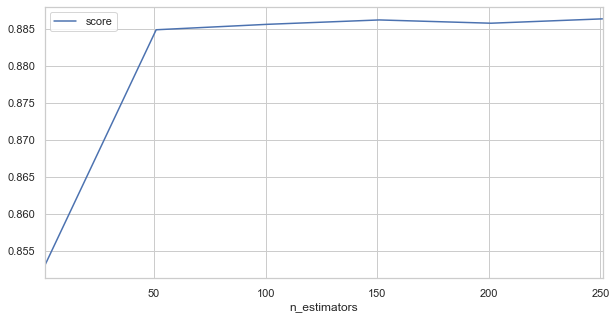

In [204]:
scores_df_bgcl.plot(x='n_estimators', y='score' ,figsize=(10,5), grid=True  )

In [205]:
scores_df_bgcl[scores_df_bgcl['score'] == scores_df_bgcl['score'].max()]

,n_estimators,score
5,251.0,0.886317


In [209]:
# With bagging, the highest score is with the number of estimators set to 251.

# Implement AdaBoosting on the Decision Tree to improve performance

In [210]:
from sklearn.ensemble import AdaBoostClassifier
abcl10 = AdaBoostClassifier(base_estimator=dTree, n_estimators=10, random_state=1)
abcl10 = abcl10.fit(X_train, y_train)

0.8740047183721616


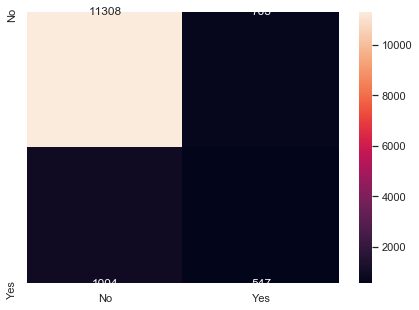

In [211]:
y_predict = abcl10.predict(X_test)
print(abcl10.score(X_test, y_test))

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                     columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

# Vary the number of estimators to assess the impact on model score

In [212]:
scores_df_abcl = pd.DataFrame()
for d in range(1,300,50):
    abcl_models = AdaBoostClassifier(base_estimator=dTree, n_estimators=d, random_state=1)
    abcl_models = abcl_models.fit(X_train, y_train)
    scores_df_abcl = scores_df_abcl.append({'n_estimators': d, 'score': abcl_models.score(X_test,y_test)}, ignore_index=True)

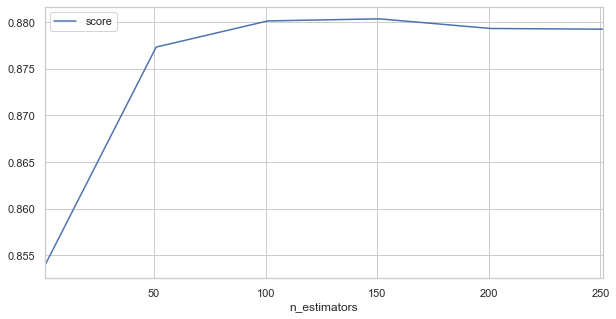

In [213]:
scores_df_abcl.plot(x='n_estimators', y='score' ,figsize=(10,5), grid=True  )

In [214]:
scores_df_abcl[scores_df_abcl['score'] == scores_df_abcl['score'].max()]

,n_estimators,score
3,151.0,0.880345


In [215]:
# With AdaBoost, the highest score is with the number of estimators set to 151. Beyond this, increasing the estimators
# will not increase the accuracy of the model.

# Implement Gradient Boosting on the Decision Tree to improve performance

In [216]:
# Ensemble Learning - GradientBoost

In [217]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl50 = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl50 = gbcl50.fit(X_train, y_train)

0.8908139191978768


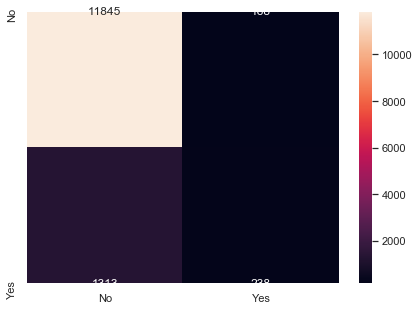

In [219]:
y_predict = gbcl50.predict(X_test)
print(gbcl50.score(X_test, y_test))

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                     columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

# Vary the number of estimators to assess the impact on model score

In [220]:
scores_df_gbcl = pd.DataFrame()
for d in range(1,300,50):
    gbcl_models = GradientBoostingClassifier(n_estimators = d, random_state=1)
    gbcl_models = gbcl_models.fit(X_train, y_train)
    scores_df_gbcl = scores_df_gbcl.append({'n_estimators': d, 'score': gbcl_models.score(X_test,y_test)}, ignore_index=True)

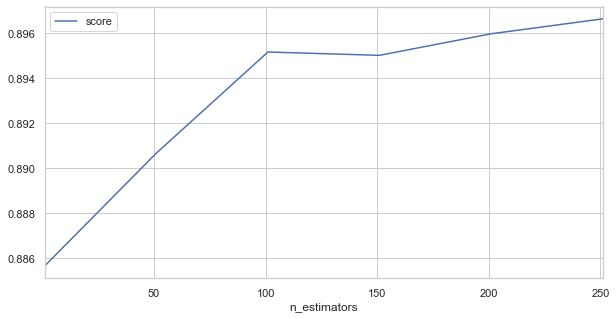

In [221]:
scores_df_gbcl.plot(x='n_estimators', y='score' ,figsize=(10,5), grid=True  )

In [222]:
scores_df_gbcl[scores_df_gbcl['score'] == scores_df_gbcl['score'].max()]

,n_estimators,score
5,251.0,0.896638


In [223]:
# With GradientBoost, the highest score is with the number of estimators set to 251. 

# Generate a random forest

In [224]:
# Ensemble Learning - Random Forest Classifier

In [225]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=50, random_state = 1, max_features=12)
rfcl=rfcl.fit(X_train, y_train)

0.8880861102919493


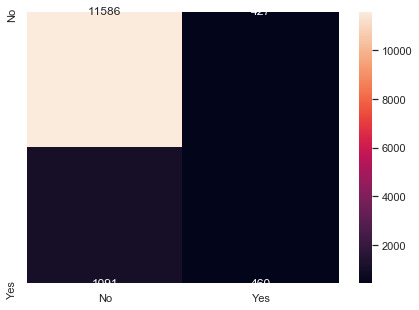

In [226]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                     columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

# Vary the number of estimators and max features to assess the impact to the score

In [230]:
scores_df_rfcl = pd.DataFrame()
for d in range(1,275,50):
    for f in range(1,25,5):
        rfcl_models = RandomForestClassifier(n_estimators=d, random_state = 1, max_features=f)
        rfcl_models = rfcl_models.fit(X_train, y_train)
        scores_df_rfcl = scores_df_rfcl.append({'n_estimators': d, 'max_features' : f, 'score': rfcl_models.score(X_test,y_test)}, ignore_index=True)

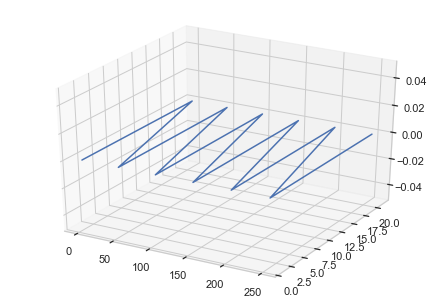

In [245]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
x = scores_df_rfcl['n_estimators']
y = scores_df_rfcl['max_features']
z = scores_df_rfcl['score']
ax.plot(x, y, zs=0, zdir='z', label='zs=0, zdir=z')

In [247]:
scores_df_rfcl[scores_df_rfcl['score'] == scores_df_rfcl['score'].max()]

,max_features,n_estimators,score
12,11.0,101.0,0.889855


In [248]:
# Best accuracy of random forest is with 11 features and 101 estimators. Accuracy achieved is 88.9%

# Models and Parameter Analysis - Summary

In [249]:
# Below are the scores from various models and variations of the parameters.

# Logistic Regression Unbalanced Data            : 0.89
# Logistic Regressin Balanced Data (SMOTE)       : 0.87
# Decision Tree (Overfitted)                     : 0.852
# Decision Tree (Pruned) - max depth=7           : 0.889
# Bagging, 251 estimators                        : 0.886
# AdaBoost 151 estimators                        : 0.880
# Gradient Boost, 251 estimators                 : 0.896
# Random forest, 101 estimators, 11 max features : 0.889

In [251]:
# Comparison of Logistic Regressio with balanced and unbalanced data:
# Since the unbalanced dataset will train the model to be biased towards the decision with higher data, the accuracy may 
# be a bit skewed. It is preferable to use the model that has balanced data, even though the accuracy is 87%

In [252]:
# The score of the decision tree (overfitted with no pruning) has scores of 99% with the training data and 85% with the test data.
# Since the data is overfitted, the score with training data is likely to be high. The overall prediction accuracy is 85%
# When the model was pruned to fit up to a depth of 3 nodes, the training and test datasets had an accuracy of 88%. 
# To optimize the max_depth, we ran the pruned model varying the max_depth from 1 to 50, stepping it up by 1 each time. 
# The best score was achieved with a max depth of 7. The score was 88.9%. This is a gain from 88.5% to 88.9%.
# For the sake of simplicity, we could also stay with a lower max_depth since the gain in score is not significantly high.
# Increasing the max_depth beyond a threshold does not increase the accuracy of the model.

In [253]:
# Bagging and Boosting will decrease variances due to single estimates as they combine several estimates from different models. 
# Bagging and Bossting should result in a model with higher stability.
# In our dataset, Bagging also yielded a model with a score of 88.6% and did not materially change the predictability of
# a pruned decision tree.

In [254]:
# Increasing the number of estimators on bagging did not materially increase the model score. Further increasing the estimators
# will likely decrease the model score. The optimal value was achieved with 251 estimators.

In [255]:
# Increasing the number of estimnators on the boosting algorithm also marginally increased the model score. 
# Adding more trees beyond a limit does not improve the performance of the model.
# Boosted tree model is constructed sequentially where each new tree attempts to correct for the errors made by the 
# sequence of previous trees. Quickly, the model reaches a point of diminishing returns.

In [256]:
# The highest accuracy was achieved with a decision tree with gradient boosting with 251 estimators. The score of model
# was 89.6%